In [ ]:
%load_ext watermark
%watermark


In [1]:
import pandas as pd
df = pd.read_csv("/home/carlostr/curso_data_science-master/Secciones/Seccion4.Analisis_y_procesado_de_datos/Visualización de datos en Python/boston_dataset.csv")

df = df.rename(columns={
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "ZN":"PCT_ZONA_RESIDENCIAL",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS":"RIO_CHARLES",
    "NOX":"OXIDO_NITROSO_PPM",
    "RM":"N_HABITACIONES_MEDIO",
    "AGE":"PCT_CASAS_40S",
    "DIS_EMPLEO":"DISTANCIA_CENTRO_EMPLEO",
    "RAD":"DIS_AUTOPISTAS",
    "TAX":"CARGA_FISCAL",
    "PTRATIO":"RATIO_PROFESORES",
    "B":"PCT_NEGRA",
    "MEDV":"VALOR_MEDIANO",
    "LSTAT":"PCT_CLASE_BAJA"
})
import matplotlib.pyplot as plt #Pandas usa matplotlib por debajo para hacer sus graficos
# asi que para la configuracion lo tenemos que importar
import matplotlib.pyplot as plt #Pandas usa matplotlib por debajo para hacer sus graficos
# asi que para la configuracion lo tenemos que importar
plt.style.use("seaborn-v0_8-dark-palette")
%matplotlib notebook

In [ ]:
df.plot.scatter(x="N_HABITACIONES_MEDIO",y="VALOR_MEDIANO",marker="*",color="red") 
plt.title("Relacion entre el numero de habitaciones y el valor mediano de las casas \n")
plt.xlabel("Numero de habitaciones")
plt.ylabel("Valor mediano de las viviendas ($k)")

In [ ]:
plt.style.available #Estilos de graficas 

In [ ]:
df.plot.scatter(x="N_HABITACIONES_MEDIO",y="VALOR_MEDIANO",marker="*",color="green") 
plt.title("Relacion entre el numero de habitaciones y el valor mediano de las casas \n")
plt.xlabel("Numero de habitaciones")
plt.ylabel("Valor mediano de las viviendas ($k)")

In [ ]:
from ipywidgets import interact

In [ ]:
@interact(col=df.columns.tolist())
def grafico_variable(col):
    df.plot.scatter(x=col,y="VALOR_MEDIANO")
    plt.title("{} vs VALOR MEDIANO".format(col))

In [ ]:
grafico_variable("INDICE_CRIMEN") #Esta funcion nos devuelve el grafico de criminalidad vs valor mediano

In [ ]:
df.plot.scatter(x='LON',y='LAT')

In [3]:
import cartopy.crs as ccrs
from cartopy.io import img_tiles

In [4]:
primer_quintil = df.VALOR_MEDIANO.quantile(0.2)
primer_quintil 


15.3

In [5]:
tercer_quintil = df.VALOR_MEDIANO.quantile(0.8)
tercer_quintil

28.2

<IPython.core.display.Javascript object>


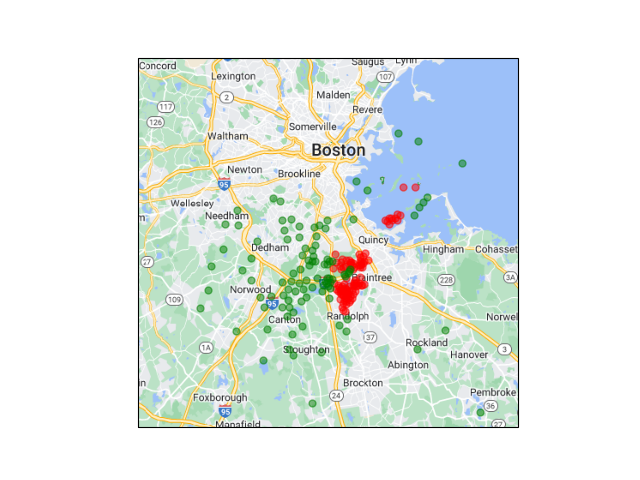

In [6]:
imagery = img_tiles.GoogleTiles()
ax = plt.axes(projection=imagery.crs)

limites_mapa = (-71.38, -70.77,42.03,42.47)

ax.set_extent(limites_mapa)

ax.add_image(imagery,10)

df_primer_qt = df[df.VALOR_MEDIANO<primer_quintil]

df_tercer_qt = df[df.VALOR_MEDIANO>tercer_quintil]

plt.plot(df_primer_qt.LON,df_primer_qt.LAT,transform=ccrs.Geodetic(),marker=".",markersize=10,color="red", linewidth=0,alpha=0.5)

plt.plot(df_tercer_qt.LON,df_tercer_qt.LAT,transform=ccrs.Geodetic(),marker=".",markersize=10,color="green", linewidth=0,alpha=0.5)

plt.show()